In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('de_sp_orders_q1_full_last_version.csv', sep=';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4791413 entries, 0 to 91412
Data columns (total 38 columns):
scm_n_order_pos_nr                  int64
scm_n_order_nr                      int64
tdt_t_key_order_date                object
scm.THR_C_KEY_ORDER_HOUR            object
scm.SIT_N_KEY_SITE                  int64
scm.CUS_N_KEY_CUSTOMER              int64
scm.SCM_SALES_BMF                   float64
scm.SCM_SALES_CANCEL_BMF            float64
scm.SCM_D_FINANCE_CM1               float64
scm.SCM_D_FINANCE_CM2               float64
scm.SCM_D_ORIG_FINANCE_ORDER_NET    float64
scm.SCM_AP_ID                       int64
scm.SCM_AS_ID                       int64
scm.SCM_MASTER_AP_ID                int64
scm.SCM_IS_ZSP_ORDER                int64
scm.SCM_C_ORDER_STATUS              object
scm.CTP_N_KEY_CUSTOMER_TYPE         int64
scm.SCM_OCI_LAND                    object
scm.SCM_D_FC_ID                     int64
scm.SCM_D_PC_DSP                    int64
scm.SCM_FC_SPLIT                   

In [5]:
data.head(15)[data.columns[35:]]

,op.OP_AS_ID,op.OP_BONUSPOINTS,bp.BP_TYP
0,653330,0,B
1,2093462,0,B
2,2127902,200,B
3,789703,95,B
4,635621,0,B
5,1275021,0,B
6,1930256,0,B
7,915819,0,B
8,1930197,0,B
9,2104803,0,B


In [6]:
data.columns = ['SCM_N_ORDER_POS_NR',                  
'SCM_N_ORDER_NR', 
'TDT_T_KEY_ORDER_DATE',
'THR_C_KEY_ORDER_HOUR',            
'SIT_N_KEY_SITE',                  
'CUS_N_KEY_CUSTOMER',              
'SCM_SALES_BMF',                   
'SCM_SALES_CANCEL_BMF',            
'SCM_D_FINANCE_CM1',               
'SCM_D_FINANCE_CM2',               
'SCM_D_ORIG_FINANCE_ORDER_NET',    
'SCM_AP_ID',                       
'SCM_AS_ID',                       
'SCM_MASTER_AP_ID',                
'SCM_IS_ZSP_ORDER',                
'SCM_C_ORDER_STATUS',              
'CTP_N_KEY_CUSTOMER_TYPE',         
'SCM_OCI_LAND',                    
'SCM_D_FC_ID',
'SCM_D_PC_DSP',
'SCM_FC_SPLIT',                    
'OSP_KO_COUNT',                    
'OSP_KO_COUNT_NET',                
'OSP_3_LEAD_P_PG_ID',              
'OSP_3_LEAD_P_PG_SHARE',           
'OSP_4_LEAD_P_PG_ID',              
'OSP_4_LEAD_P_PG_SHARE',           
'CZP_START_DATE',                  
'CZP_EXPIRY_DATE',                 
'CZP_ZTQ_ID',                      
'CZP_PERCENTAGE',
'CZP_PRICE',                       
'ORF_EXT_O_ID',                    
'ORF_EXT_K_ID',                    
'ORF_EXT_ROOT_K_ID',               
'OP_AS_ID',                         
'OP_BONUSPOINTS',                   
'BP_TYP']                      

In [7]:
len(data.columns)

38

In [8]:
data.head(15)[data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
0,433408800,101588421,2018-01-01 00:00:00,19:58,1,15203435,11.99,0.0,3.5356,3.1237,10.0756,32588,653330,32588,0,L,0,D,326,716
1,433408796,101588421,2018-01-01 00:00:00,19:58,1,15203435,18.99,0.0,7.4680,3.1844,15.9580,73074,2093462,73074,0,L,0,D,326,716
2,433408803,101588421,2018-01-01 00:00:00,19:58,1,15203435,0.00,0.0,-1.5000,-1.6941,0.0000,25246,2127902,25246,0,L,0,D,326,716
3,433408798,101588421,2018-01-01 00:00:00,19:58,1,15203435,0.00,0.0,-0.7800,-1.0156,0.0000,35794,789703,35794,0,L,0,D,326,716
4,433408802,101588421,2018-01-01 00:00:00,19:58,1,15203435,9.98,0.0,4.6866,4.4370,8.3866,19605,635621,19605,0,L,0,D,326,716
5,433408797,101588421,2018-01-01 00:00:00,19:58,1,15203435,5.99,0.0,1.8781,1.0480,5.5981,60519,1275021,60519,0,L,0,D,326,716
6,433408801,101588421,2018-01-01 00:00:00,19:58,1,15203435,3.49,0.0,1.2817,0.9277,3.2617,69862,1930256,69862,0,L,0,D,326,716
7,433408794,101588421,2018-01-01 00:00:00,19:58,1,15203435,5.49,0.0,1.2908,0.1030,5.1308,52405,915819,52405,0,L,0,D,326,716
8,433408795,101588421,2018-01-01 00:00:00,19:58,1,15203435,3.49,0.0,1.2817,0.9277,3.2617,69861,1930197,69861,0,L,0,D,326,716
9,433408804,101588421,2018-01-01 00:00:00,19:58,1,15203435,11.99,0.0,5.0156,4.2241,11.2056,73258,2104803,73258,0,L,0,D,326,716


In [9]:
data.index = pd.RangeIndex(len(data.index))

In [10]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%Y-%m-%d")

In [11]:
data['ORDER_DATETIME'] = data['TDT_T_KEY_ORDER_DATE'].astype(str) + ' ' + data['THR_C_KEY_ORDER_HOUR'].astype(str) + ':00'

In [12]:
data['ORDER_DATETIME'] = pd.to_datetime(data['ORDER_DATETIME'], 
                                      format="%Y-%m-%d %H:%M:%S")

In [13]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%Y-%m-%d %H:%M:%S")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%Y-%m-%d %H:%M:%S")

In [14]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [15]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [16]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [17]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [18]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [19]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [20]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [21]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [22]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [23]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [24]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(4791413, 662896)

In [25]:
#CHECK DUPLICATED ROWS

In [26]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [27]:
len(dupl_mask), sum(dupl_mask)

(662896, 2805)

In [28]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [29]:
dup_orders[:10]

array([101650528, 101669270, 101671414, 101671574, 101684403, 101707879,
       101729880, 101927435, 101965320, 101995324], dtype=int64)

In [30]:
len(dup_orders)

2805

In [31]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

49942

In [32]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [33]:
cust_2_dup_orders

array([ 142923, 2509783, 5069737, 5411654, 7194772, 9151214], dtype=int64)

In [34]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([106924574, 106925462, 107120624, 107118634, 107397752, 107426910,
       107426832, 107449911, 107532018, 107545854, 107673305, 107644950],
      dtype=int64)

In [35]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [36]:
len(dup_indexes)

2793

In [37]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [38]:
len(dup_indexes)

2799

In [39]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [40]:
len(dupl_ind)

24971

In [41]:
exclude_data = data.index.isin(dupl_ind)

In [42]:
data = data[~exclude_data]

In [43]:
len(data)

4766442

In [44]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [45]:
ztq = [51, 52, 53, 54, 55, 56]

## Gathering metrics

In [46]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [47]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,85332,206973,11230638.72,10377378.73,2907382.73,1492326.14,28.02,14.38,-588141.66,0.67,-8032.03,10.92,-55876.25
1,52,60313,152392,9781720.43,8972282.23,2404121.66,1210631.61,26.79,13.49,-510252.68,0.99,-10280.79,12.63,-62258.41
2,53,38771,95800,6082190.39,5611602.39,1557189.62,850587.40,27.75,15.16,-455200.50,0.84,-4518.83,11.09,-31564.07
3,54,37457,104856,7908275.33,7224481.58,1781242.42,849183.59,24.66,11.75,-622846.80,1.85,-13801.76,17.32,-84900.22
4,55,8857,16893,951307.00,862996.01,237283.90,118527.98,27.50,13.73,-49635.68,0.65,-615.48,12.53,-6663.31
5,56,19529,49975,3323718.62,3002160.54,721625.46,318885.19,24.04,10.62,-245450.72,1.12,-6129.94,19.70,-43770.12


In [48]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [49]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,85332,206973,1.12306e+07,1.03774e+07,2.90738e+06,1.49233e+06,28.02,14.38,-588142,0.67,-8032.03,10.92,-55876.2
1,52,60313,152392,9.78172e+06,8.97228e+06,2.40412e+06,1.21063e+06,26.79,13.49,-510253,0.99,-10280.8,12.63,-62258.4
2,53,38771,95800,6.08219e+06,5.6116e+06,1.55719e+06,850587,27.75,15.16,-455200,0.84,-4518.83,11.09,-31564.1
3,54,37457,104856,7.90828e+06,7.22448e+06,1.78124e+06,849184,24.66,11.75,-622847,1.85,-13801.8,17.32,-84900.2
4,55,8857,16893,951307,862996,237284,118528,27.5,13.73,-49635.7,0.65,-615.48,12.53,-6663.31
5,56,19529,49975,3.32372e+06,3.00216e+06,721625,318885,24.04,10.62,-245451,1.12,-6129.94,19.7,-43770.1


## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

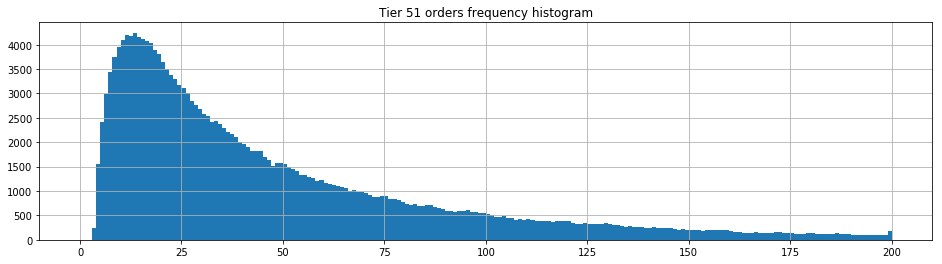

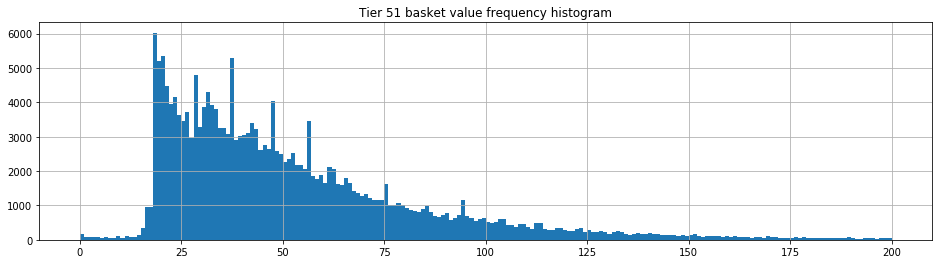

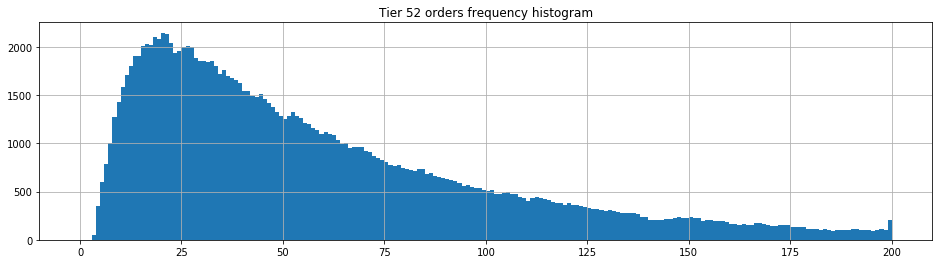

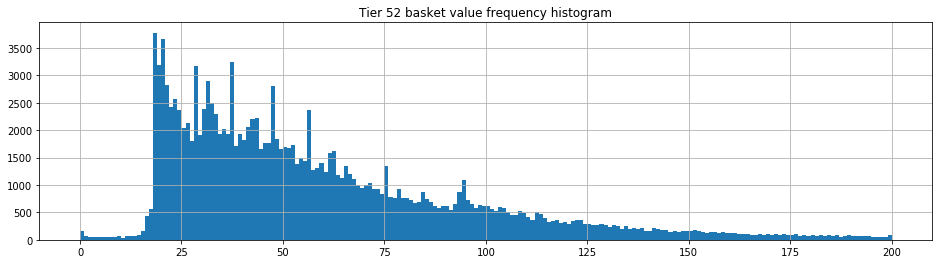

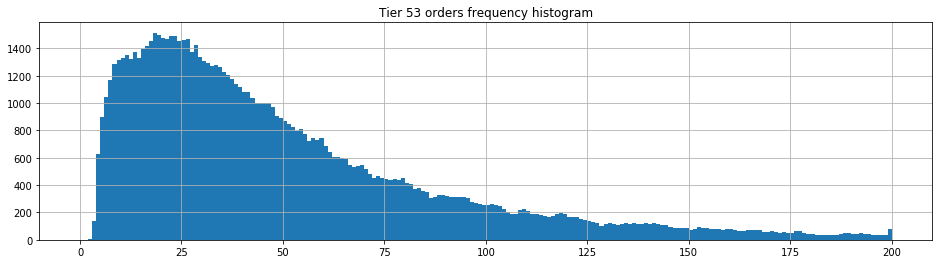

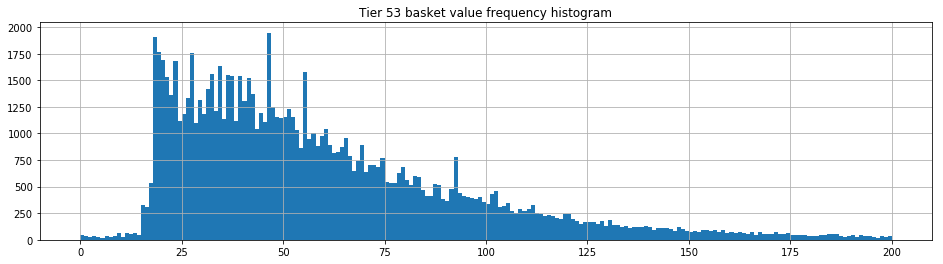

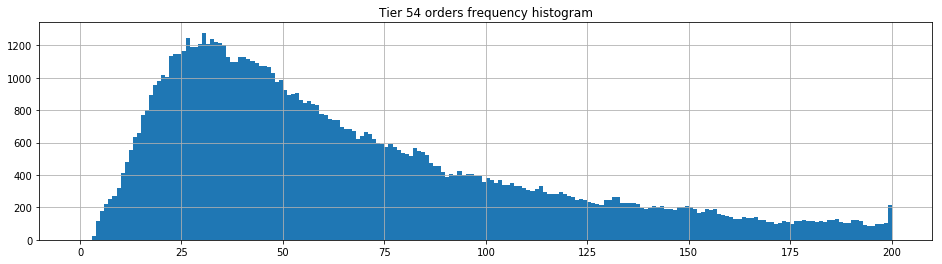

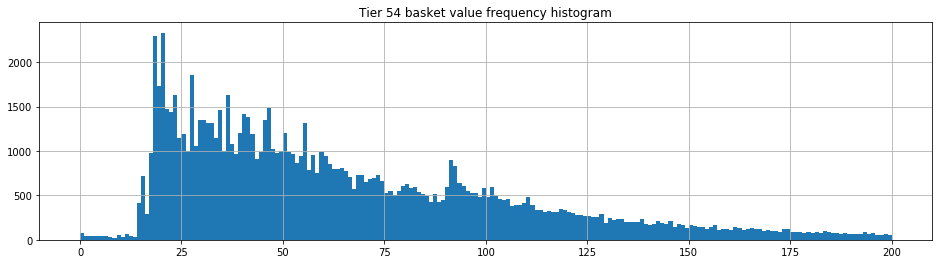

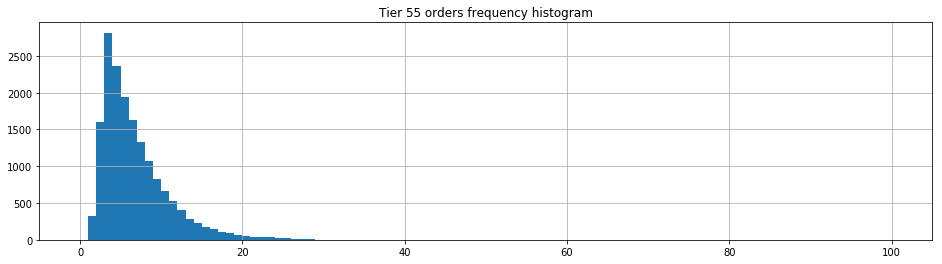

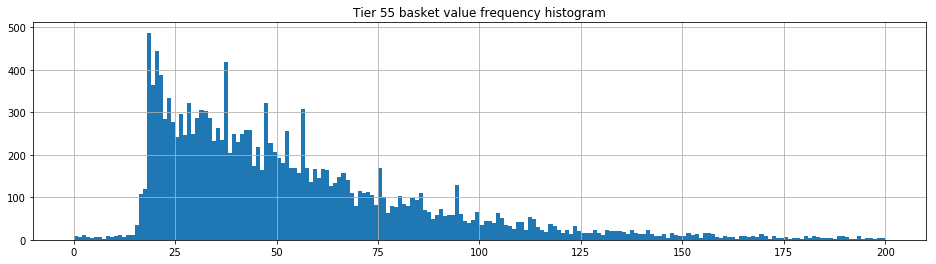

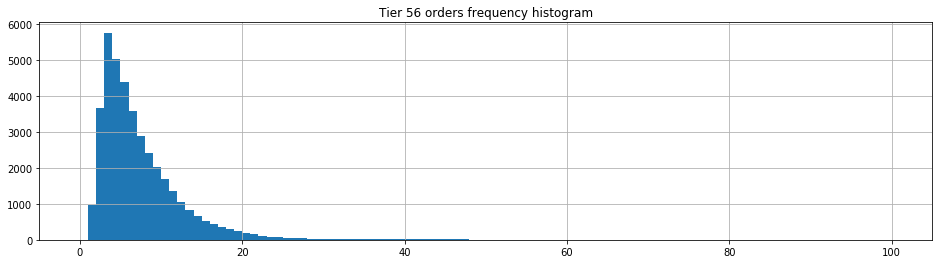

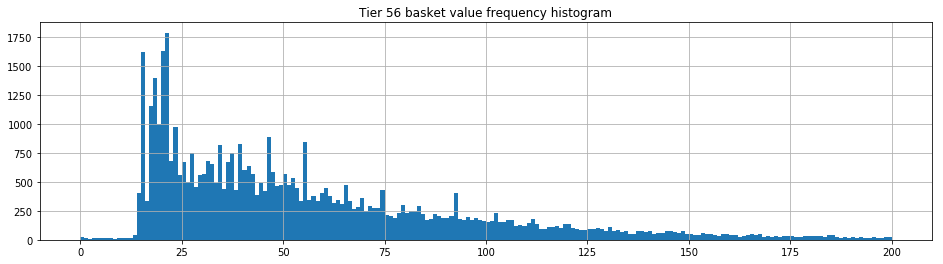

In [50]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [51]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,206973,54.82,61.1,3,18,35,70,901
1,52,152392,71.32,74.21,2,26,49,90,4017
2,53,95800,58.11,61.87,2,22,40,71,755
3,54,104856,278.69,1097.01,2,35,61,117,8038
4,55,16893,6.33,4.26,1,3,5,8,38
5,56,49975,1122.23,2319.99,1,4,7,17,8589


In [52]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,206973,54.26,39.82,-23.03,29.1,43.69,66.47,1876.57
1,52,152392,64.19,54.95,-23.72,31.78,49.81,80.33,6158.39
2,53,95800,63.49,49.02,-21.94,33.12,51.12,79.32,1822.01
3,54,104856,75.42,70.43,-19.4,33.47,56.43,95.97,3624.84
4,55,16893,56.31,40.64,-10.66,29.47,45.75,70.04,673.32
5,56,49975,66.51,127.37,-18.93,25.94,46.88,80.08,8378.99


**Existing customers:**

[Orders]

Short term (1y renewal):
- Tier 51: 18-35-70
- Tier 53: 22-40-71

Long term (3y renewal):
- Tier 52: 26-49-90 (percentiles around 40% greater than Tier 51)
- Tier 54: 35-61-117 (percentiles around 60% greater than Tier 53)


[Basket Value]

Basket Value Mean and percentiles from Tier 53 close from those of Tier 52 (expected to be closer to Tier 54 Basket Value, further analysis looking for a new renewal threshold that downgrades some customers)

**New customers:**

[Orders]

Strong resellers activity in Tier 56

### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [53]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [54]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [55]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [56]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [57]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [58]:
data['BP_TYP'].unique()

array(['B ', nan], dtype=object)

In [59]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [60]:
ord_bp

array([101588421, 101586228, 101557499, ..., 107779543, 107779269,
       107779101], dtype=int64)

In [61]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [62]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [63]:
import cx_Oracle

In [64]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([  2068,    252, 183134,    857,    301,     36,    251,     18,
         9788,     34,     29,     15,      9,     16,     37,     33,
         1106, 207553,     45,     23,   1540,     20,    409,   2190,
          305,    221,     42,   1400,     48, 153317,     67,    401,
           38,  40023,    486,   2155,     62,     65,   2192,  17947,
          758,   2471,    484,     51, 207624,    274,     68,   9885,
          741,    470,     47, 122398,  48963,   1635,     50,  49828,
       257304,  49821,   1603,   8038, 122375,  15781,   3119, 126729,
       255413, 257336, 126778], dtype=int64)

In [65]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [66]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [67]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [68]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [69]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [70]:
pg3_dict[0] = 'null'

In [71]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [72]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(4766442, 4766442)

In [73]:
data['LEAD_PG3_NAME'] = lista_pg3

In [74]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [75]:
0 in pg4_l

False

In [76]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [77]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [78]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [79]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [80]:
pg4_dict[-1] = 'null'

In [81]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [82]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(4766442, 4766442)

In [83]:
data['LEAD_PG4_NAME'] = lista_pg4

In [84]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [85]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  662896
Total orders with negative CM1:  6531
% of negative CM1 orders:  0.9852224179961865
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -45504.1063
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
79,2068,katzenfutter_dose,1,2163,215028,1.01,1017,29979,1033,38956,296,7207,-17422.21,38.29
47,252,katzenfutter_trockenfutter,1,651,76441,0.85,332,9059,329,14050,108,2308,-5327.11,11.71
45,251,hundefutter_trockenfutter,1,586,107716,0.54,310,14258,243,18857,86,3283,-4778.49,10.50
67,857,hundefutter_nassfutter,1,367,62940,0.58,184,7891,208,10709,49,1710,-3160.99,6.95
7,18,hundesnacks,1,528,36686,1.44,142,4930,275,7512,53,1225,-2864.16,6.29
51,301,katzenstreu,1,405,49842,0.81,181,3088,195,7094,40,737,-2606.03,5.73
81,2155,balkon_garten,1,10,1609,0.62,3,288,8,203,1,40,-2249.68,4.94
17,34,katzensnacks,1,151,12386,1.22,56,2086,89,2347,28,439,-1041.47,2.29
11,23,kratzbaum_katzenbaum,1,58,8238,0.70,48,1876,11,1098,4,272,-618.98,1.36
118,207553,ungezieferschutz,1,381,1842,20.68,41,158,99,270,10,27,-614.12,1.35


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
4651,2155,balkon_garten,2157,katzenklappe_und_einbautuer,1,10,735,1.36,3,214,8,96,1,23,-2249.68,4.94
4271,2068,katzenfutter_dose,2072,gourmet,1,467,14295,3.27,94,1442,164,2773,29,413,-2047.92,4.50
2595,252,katzenfutter_trockenfutter,683,royal_canin,1,183,13492,1.36,90,1358,101,2566,38,410,-1685.74,3.70
4293,2068,katzenfutter_dose,2127,almo_nature,1,120,11361,1.06,64,1259,69,2047,20,346,-1201.46,2.64
4329,2068,katzenfutter_dose,2632,cosma,1,111,9252,1.20,74,1448,53,1899,24,396,-1025.21,2.25
4267,2068,katzenfutter_dose,2069,animonda_rafine,1,104,14278,0.73,58,1293,65,2464,22,323,-972.40,2.14
4279,2068,katzenfutter_dose,2079,miamor,1,103,11204,0.92,52,1352,64,2061,15,337,-911.84,2.00
4285,2068,katzenfutter_dose,2096,animonda,1,65,7593,0.86,41,908,31,1347,9,241,-845.67,1.86
2265,251,hundefutter_trockenfutter,682,royal_canin_size,1,70,6666,1.05,33,587,26,1069,5,143,-801.43,1.76
4537,2068,katzenfutter_dose,129282,leonardo,1,54,5537,0.98,32,979,30,1046,9,224,-765.08,1.68


........................................................................................
........................................................................................



Be care of price policy at:
- katzenfutter_dose (gourmet, almo nature, cosma...)

## A level down through physical article level...

In [86]:
ap_list = list(data['SCM_AP_ID'].unique())

In [87]:
len(ap_list)

8538

In [88]:
ap_list.remove(0)

In [89]:
0 in ap_list

False

In [90]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000


In [91]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [92]:
freq_list = []

for n, i in enumerate(ap_list):
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600
8000
8400


In [93]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [94]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [95]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [96]:
freq_df[(freq_df['TOT_ORDERS'] > 100) & (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
8490,77014,Wolf of Wilderness 100 g - Green Fields Adult,-0.27,-0.27,-0.27,-0.27,-0.27,-0.27,174,0,0,0,174,0,100.00,0.00
2098,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,20129,0,354,0,19775,0,100.00,1.76
601,20886,Extra Bonuspunkte - 200 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,6550,0,133,0,6417,0,100.00,2.03
7698,69683,Concept for Life Cat Maine Coon - 50 g,-0.70,-1.05,-0.28,-0.85,-0.85,-0.57,251,0,22,0,229,0,100.00,8.76
7700,69735,CFL Mini Adult - 80 g,-0.79,-1.20,-0.33,-1.00,-1.00,-0.33,206,0,16,0,190,0,100.00,7.77
7697,69732,Concept for Life Cat Kitten - 50 g,-0.67,-1.02,-0.07,-0.85,-0.85,-0.31,361,0,29,0,332,0,100.00,8.03
7979,64575,Katzenspielzeug Wild Wobbler - 1 pcs / only gr...,-5.22,-10.36,-5.18,-5.18,-5.18,-5.18,129,127,14,0,115,0,100.00,10.85
347,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,10568,10543,140,0,10428,0,100.00,1.32
7219,78347,Kalender 2018 - 2018 zooplus Tiermotive - INT,-0.92,-1.72,-0.86,-0.86,-0.86,-0.86,102,92,3,0,99,0,100.00,2.94
6982,73495,"Ferrero - Kinder Schoko Bons, 200g",-2.41,-6.30,-2.10,-2.10,-2.10,-2.10,116,116,6,0,110,0,100.00,5.17


In [97]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(30)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
3007,25838,zooplus.de Geschenkgutschein Geschenkgutschein,4.00,0.00,46.73,0.00,0.00,0.00,622,0,508,6,0,108,81.67,81.67
5010,17096,Gino Hundekissen - 80 x 55 cm,-4.92,-16.08,15.90,-8.16,-8.00,-7.94,201,153,37,1,120,45,78.11,18.41
2758,60458,Kratztonne Diogenes M - beige / H 75 x Ø 36 cm,1.08,-20.54,14.69,-19.49,8.91,9.34,91,28,15,1,13,62,30.77,16.48
5806,35772,Julius-K9 Powergeschirr - schwarz - Größe 1: 6...,6.25,-13.77,28.09,7.26,9.72,9.75,37,5,6,0,0,31,16.22,16.22
2211,67848,Pro Plan Cat Sterilised reich an Lachs - 10 kg,3.07,-9.36,23.07,-4.12,3.72,9.76,34,0,5,1,6,22,32.35,14.71
6385,75714,Greenies 340gr - teenie,-0.43,-12.09,17.55,-1.62,-1.21,-0.53,177,0,26,1,108,43,75.71,14.69
2726,12920,Nylon Tragetasche - schwarz,1.02,-14.64,79.15,-7.32,5.26,5.28,182,73,24,1,49,108,40.11,13.19
5103,26993,Nature Plus Häuschen mit Heuraufe - L 54 x B 4...,1.62,-20.64,24.48,-10.32,8.01,8.16,31,11,4,0,7,20,35.48,12.90
6113,68408,Hunter Führleine Softie Nickel - B 20 x L 100 ...,-4.83,-8.18,5.47,-8.18,-8.18,2.74,99,67,12,0,57,30,69.70,12.12
4906,70077,"EARTHBORN HOLISTIC Primitive Natural - 2,5 kg",-0.69,-9.68,5.26,-0.69,-0.34,-0.34,42,1,5,0,36,1,97.62,11.90


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [98]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [99]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [100]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
438773,16667461,3,15160.75,34,-666.81
248095,7112172,1,3291.25,24,-645.42
123096,2494869,1,1000.09,18,-192.76
438772,16667461,2,9806.64,34,-40.48
116386,2330823,1,1491.95,25,-11.53
438771,16667461,1,14401.15,41,1.55
354994,12014978,3,2577.27,95,16.05
773,10764,3,3219.38,69,50.30
354993,12014978,2,2206.38,73,51.69
99652,1931004,3,1068.20,47,59.88


In [101]:
# 22 root_customer_id
list(resellers['ORF_EXT_ROOT_K_ID'].unique())

[16667461,
 7112172,
 2494869,
 2330823,
 12014978,
 10764,
 1931004,
 73388,
 10053452,
 871102,
 70299,
 1143717,
 2021964,
 15902877,
 10658622,
 1193498,
 305501,
 1578108,
 12113195,
 14011473,
 10433351,
 5362811]

In [102]:
# 120 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([  525388, 14889985, 18461809, 14790718, 18505123, 16328933,
         431852,   871102, 16667461, 18461914,  6416352,  2494869,
        2021964, 12014978, 14736454, 18841695,  2330823,  3297537,
         764216, 16899006, 10053452, 15469684,    70299, 12219962,
        2305949,  7223162,  6717972,  1451444,  1489875, 14011509,
       18164674,  1969098,  5386534,   319896,  6215479,  9163250,
       15902877,  2825193,   656459,  5805963, 16233761, 17202656,
        7867676, 10658622, 12579354,  8819864,  5852182,  6307963,
        2638385,  1696248, 13214627,  1158625,  9362683,  2971294,
       10358734,  2354109, 14287069,   546480,  8870903,  6423138,
        7816103, 16652897, 14414001,  8350410,  6161962,  8441502,
         174456,  6346528, 19213384,  2674574,  1095985, 18802223,
        2068649, 13136613, 18907504,  8395704, 18222111,  2874995,
       17954698,  4035621, 17519880,   290566, 19207278,  5106563,
       17056466,  3049460, 18533637,    10764, 19074989,  8711

In [103]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [104]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [105]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,20,71,5005.90,4614.38,1451.37,991.04,31.45,21.48,1.41,-1.12,12.68,-23.80,0.034304,0.04,0.04
1,52,27,533,32280.76,29253.32,6921.04,3451.15,23.66,11.80,2.06,-180.49,15.57,-473.84,0.349756,0.33,0.33
2,53,12,68,3450.96,3147.37,784.41,317.93,24.92,10.10,1.47,-2.38,23.53,-20.76,0.0709812,0.06,0.06
3,54,20,3627,125980.11,113864.69,24213.02,3183.48,21.26,2.80,1.19,-522.36,38.68,-4459.72,3.45903,1.59,1.58
4,55,1,2,59.00,54.96,11.72,1.42,21.33,2.58,0.00,0.00,0.00,0.00,0.0118392,0.01,0.01
5,56,41,10768,391443.64,351324.77,78471.76,17944.04,22.34,5.11,0.57,-2450.44,32.08,-9372.33,21.5468,11.78,11.70


In [106]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [107]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [108]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,85332,20,206973,0.034304,11230638.72,0.04,10377378.73,0.04
1,52,60313,27,152392,0.349756,9781720.43,0.33,8972282.23,0.33
2,53,38771,12,95800,0.0709812,6082190.39,0.06,5611602.39,0.06
3,54,37457,20,104856,3.45903,7908275.33,1.59,7224481.58,1.58
4,55,8857,1,16893,0.0118392,951307.00,0.01,862996.01,0.01
5,56,19529,41,49975,21.5468,3323718.62,11.78,3002160.54,11.70


In [109]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,2907382.73,0.05,1492326.14,0.07,28.02,31.45,14.38,21.48,0.67,1.41
1,2404121.66,0.29,1210631.61,0.29,26.79,23.66,13.49,11.80,0.99,2.06
2,1557189.62,0.05,850587.40,0.04,27.75,24.92,15.16,10.10,0.84,1.47
3,1781242.42,1.36,849183.59,0.37,24.66,21.26,11.75,2.80,1.85,1.19
4,237283.90,0.00,118527.98,0.00,27.50,21.33,13.73,2.58,0.65,0.00
5,721625.46,10.87,318885.19,5.63,24.04,22.34,10.62,5.11,1.12,0.57


In [110]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-8032.03,0.01,10.92,12.68,-55876.25,0.04
1,-10280.79,1.76,12.63,15.57,-62258.41,0.76
2,-4518.83,0.05,11.09,23.53,-31564.07,0.07
3,-13801.76,3.78,17.32,38.68,-84900.22,5.25
4,-615.48,-0.00,12.53,0.00,-6663.31,-0.00
5,-6129.94,39.97,19.70,32.08,-43770.12,21.41


During Q1 time window:

- High presence of resellers orders in Tiers 54 and 56.

- Percentage of orders with negative CM1 higher in Tiers 54 and 56 but lower when looking at those coming from resellers (resellers from 56 having the lowest %). However, those 0.57% negative orders from Tier 56 resellers represent almost a 40% from total loss in CM1 for the Tier. 

- Percentage of negative CM2 orders highly increasing when looking at resellers in Tiers 53, 54 and 56.

- Resellers in 56 represent a 21.5% of tier orders, 12% of net_sales, 11% of CM1 and almost 6% of CM2.

- Regarding total amount of orders placed per tier, high loss in CM2 for Tier 54.

### Resellers activity by account

In [111]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [112]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
2,18461809,5362811,[56],4826,135619.06,122441.60,30923.08,6685.03,25.26,5.46,0.48,-1006.57,32.53,-3552.09
9,18461914,5362811,[56],4351,126473.75,114126.62,28790.98,6423.25,25.23,5.63,0.25,-975.51,30.18,-2797.72
89,8711842,5362811,[54],3069,79934.41,72549.91,17034.09,2702.35,23.48,3.72,0.68,-301.70,37.80,-2005.91
119,15539485,5362811,[52],1,57.43,55.31,-115.16,-119.37,-208.20,-215.81,100.00,-115.16,100.00,-119.37
14,14736454,7112172,[54],34,12282.14,10461.12,871.87,-1591.85,8.33,-15.22,17.65,-108.45,94.12,-1606.39
74,18907504,10764,[56],26,1246.91,1104.38,26.38,-122.23,2.39,-11.07,15.38,-77.69,84.62,-158.08
107,18582905,10433351,[56],1,20.26,18.93,-71.97,-83.26,-380.08,-439.71,100.00,-71.97,100.00,-83.26
104,19345483,10433351,[56],1,20.26,18.93,-71.97,-83.26,-380.08,-439.71,100.00,-71.97,100.00,-83.26
8,16667461,16667461,[56],109,47325.38,39368.54,3671.87,-705.74,9.33,-1.79,4.59,-65.77,36.70,-1504.18
105,18064404,10433351,[56],1,20.26,18.93,-62.79,-74.44,-331.59,-393.17,100.00,-62.79,100.00,-74.44


#### Customer ID 18461809

In [113]:
data[data['CUS_N_KEY_CUSTOMER'] == 18461809].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18461809].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
101568816     -0.0486
101647274     -1.6391
101696417     -0.1286
101752108     -0.0486
101799826     -0.4366
102647373     -0.0494
102647390     -0.0494
102813601     -1.9657
103055044     -3.2781
103430811     -5.3045
103504000     -5.3045
103814217     -5.3045
103936635   -544.8689
104035055     -1.1383
104035128    -35.7287
104165753     -1.1383
104206048     -2.4584
104206299     -1.1383
104274949     -0.1306
104275060     -4.0975
104275139    -10.0438
104310460     -5.3045
105897807   -376.9689
Name: SCM_D_FINANCE_CM1, dtype: float64

In [114]:
data[data['SCM_N_ORDER_NR'] == 103936635][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
1766971,443308704,103936635,2018-02-04,12:08,1,18461809,0.00,0.0,-551.2000,-557.1344,0.0000,26938,1744143,26938,0,L,0,D,328,1
1766972,443308705,103936635,2018-02-04,12:08,1,18461809,62.99,0.0,10.5328,10.0763,52.9328,26938,417791,26938,0,L,0,D,328,1
1766973,443308706,103936635,2018-02-04,12:08,1,18461809,-0.63,0.0,-0.5294,-0.5294,-0.5294,0,5,8984,0,L,0,D,0,0
1766974,443308707,103936635,2018-02-04,12:08,1,18461809,-4.37,0.0,-3.6723,-3.6723,-3.6723,0,6,42715,0,L,0,D,0,0


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
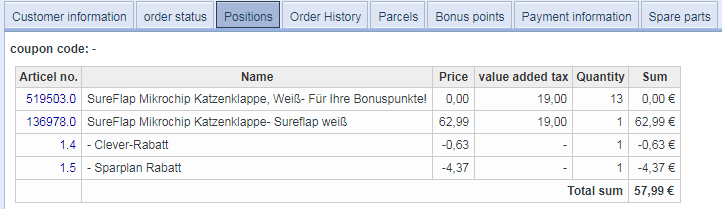

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
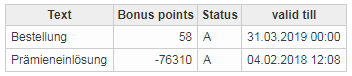

In [115]:
data[data['SCM_N_ORDER_NR'] == 105897807][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
3156140,451587453,105897807,2018-03-04,17:55,1,18461809,-0.63,0.0,-0.5294,-0.5294,-0.5294,0,5,8984,0,L,0,D,0,0
3156141,451587451,105897807,2018-03-04,17:55,1,18461809,62.99,0.0,10.3628,9.8909,52.9328,26938,417791,26938,0,L,0,D,326,1
3156142,451587450,105897807,2018-03-04,17:55,1,18461809,0.00,0.0,-383.1300,-387.3766,0.0000,26938,1744143,26938,0,L,0,D,326,1
3156143,451587452,105897807,2018-03-04,17:55,1,18461809,-4.37,0.0,-3.6723,-3.6723,-3.6723,0,6,42715,0,L,0,D,0,0


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
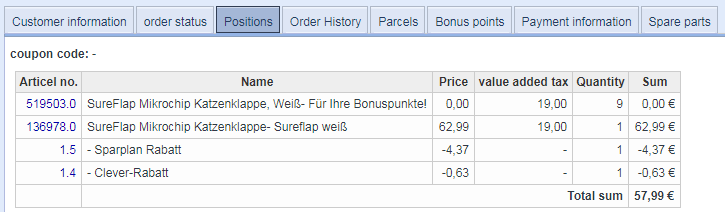

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
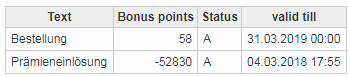

In [116]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 18461809].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18461809].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
18851,-1.086393,-1.086393,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
18864,8.462538,-4.432006,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
18865,-7.520998,-7.520998,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
61841,-0.228931,-24.434018,1,1,1,0,0,0,katzenstreu,catsan
61842,-7.532031,-7.532031,1,1,1,0,0,0,katzenstreu,catsan
62939,-1.089040,-1.089040,1,1,1,0,0,0,katzenstreu,catsan
112426,-7.520998,-7.520998,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
112427,8.462538,-3.915485,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
112428,-1.086393,-1.086393,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter
147786,-7.520998,-7.520998,1,1,1,0,0,0,katzenfutter_dose,royal_canin_veterinary_diet_feline_nassfutter


In [117]:
data[data['CUS_N_KEY_CUSTOMER'] == 18461809]['SCM_N_ORDER_NR'].nunique()

4826

In [118]:
(data[data['CUS_N_KEY_CUSTOMER'] == 18461809]['SCM_MASTER_AP_ID'] == 6169).sum()

92

In [119]:
(data[data['CUS_N_KEY_CUSTOMER'] == 18461809]['SCM_MASTER_AP_ID'] == 8984).sum()

4825

#### Customer ID 8711842

In [120]:
data[data['CUS_N_KEY_CUSTOMER'] == 8711842].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8711842].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
106020649     -5.5288
106061325     -0.2013
106168150     -0.2213
106600350     -0.2613
106718925     -0.2813
106720581     -0.2813
106728957     -1.0198
106809489     -0.3213
106950931     -0.5099
106952195     -0.5099
106998540     -0.5099
106998674     -0.5099
107067284   -252.3540
107268185     -0.5399
107423431     -0.5399
107449149     -1.0498
107520054     -0.5599
107594021    -34.8205
107620577     -0.5599
107694059     -0.5599
107744025     -0.5599
Name: SCM_D_FINANCE_CM1, dtype: float64

In [121]:
data[data['SCM_N_ORDER_NR'] == 107067284][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
4121331,456530032,107067284,2018-03-21,08:30,1,8711842,0.00,0.0,-255.6600,-259.5810,0.0000,26938,1744143,26938,0,L,0,D,326,1
4121332,456530033,107067284,2018-03-21,08:30,1,8711842,59.99,0.0,7.8018,7.1483,50.4118,26938,417791,26938,0,L,0,D,326,1
4121333,456530035,107067284,2018-03-21,08:30,1,8711842,-0.60,0.0,-0.5042,-0.5042,-0.5042,0,5,8984,0,L,0,D,0,0
4121481,456530034,107067284,2018-03-21,08:30,1,8711842,-4.75,0.0,-3.9916,-3.9916,-3.9916,0,6,42715,0,L,0,D,0,0


In [122]:
data[data['SCM_N_ORDER_NR'] == 107594021][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
4617095,458859394,107594021,2018-03-28,14:50,1,8711842,-53.7800,0.0,-50.2617,-50.2617,-50.2617,0,1,6169,0,L,0,D,0,0
4617096,458859395,107594021,2018-03-28,14:50,1,8711842,-4.8400,0.0,-4.5234,-4.5234,-4.5234,0,5,8984,0,L,0,D,0,0
4617097,458859396,107594021,2018-03-28,14:50,1,8711842,-38.3300,0.0,-35.8224,-35.8224,-35.8224,0,6,42715,0,L,0,D,0,0
4617098,458850182,107594021,2018-03-28,14:50,1,8711842,0.0000,0.0,-0.0300,-0.1892,0.0000,80008,2373360,80008,0,L,0,D,326,1
4617248,458859392,107594021,2018-03-28,14:50,1,8711842,100.8375,0.0,10.3907,7.0010,94.2407,57542,2370466,57542,0,L,0,D,326,1
4617249,458859393,107594021,2018-03-28,14:50,1,8711842,168.0625,0.0,17.5678,11.9185,157.0678,57540,2151986,57540,0,L,0,D,326,1
4617250,458859392,107594021,2018-03-28,14:50,1,8711842,168.0625,0.0,17.3178,11.6683,157.0678,57542,2370466,57542,0,L,0,D,326,1
4617251,458859393,107594021,2018-03-28,14:50,1,8711842,100.8375,0.0,10.5407,7.1511,94.2407,57540,2151986,57540,0,L,0,D,326,1


In [123]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 8711842].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8711842].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
3236944,-1.098204,-1.098204,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks
3240168,-8.676338,-8.676338,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks
3240169,8.591726,-15.810843,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks
3258710,-5.437211,-12.363310,10,3,1,0,0,0,hundesnacks,greenies
3258711,-11.851337,-26.947460,10,3,1,0,0,0,hundesnacks,greenies
3258712,-1.098906,-1.098906,10,3,1,0,0,0,hundesnacks,greenies
3258713,-8.699635,-8.699635,10,3,1,0,0,0,hundesnacks,greenies
3341118,8.474208,-15.928361,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks
3341119,-1.098204,-1.098204,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks
3341120,-8.676338,-8.676338,10,3,1,0,0,0,hundesnacks,zahnpflege_snacks


#### Customer ID 2305949

In [124]:
data[data['CUS_N_KEY_CUSTOMER'] == 2305949].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 2305949].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
102648465   -0.9865
106862068   -1.5081
107174289   -1.4562
107517512   -9.0803
Name: SCM_D_FINANCE_CM1, dtype: float64

In [125]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 2305949].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 2305949].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
777087,-2.960739,-29.759563,3,1,1,0,0,0,ungezieferschutz,spoton
777096,6.887390,-13.140547,3,1,1,0,0,0,ungezieferschutz,spoton
777097,-8.691414,-8.691414,3,1,1,0,0,0,ungezieferschutz,spoton
777098,-1.099058,-1.099058,3,1,1,0,0,0,ungezieferschutz,spoton
3869812,-8.852239,-29.934826,11,3,1,0,1,0,ungezieferschutz,spoton
3870075,-1.098509,-1.098509,11,3,1,0,1,0,ungezieferschutz,spoton
3870076,9.678052,-10.339296,11,3,1,0,1,0,ungezieferschutz,spoton
3870077,-8.687076,-8.687076,11,3,1,0,1,0,ungezieferschutz,spoton
4217097,0.000000,0.000000,12,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
4217098,-8.710116,-8.710116,12,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin


#### Customer ID 2494869

In [126]:
data[data['CUS_N_KEY_CUSTOMER'] == 2494869].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 2494869].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
101812182   -16.9907
102153066   -12.3745
102414207    -3.4978
102728656    -8.4184
102796482    -0.8400
102808047    -0.8400
103840919    -0.4206
Name: SCM_D_FINANCE_CM1, dtype: float64

In [127]:
data[data['SCM_N_ORDER_NR'] == 101812182][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
197737,434317112,101812182,2018-01-04,14:56,1,2494869,-1.58,0.0,-1.4766,-1.4766,-1.4766,0,6,42715,0,L,0,D,0,0
197818,434317111,101812182,2018-01-04,14:56,1,2494869,9.99,0.0,1.6764,-0.4405,9.3364,65444,2318263,65444,0,L,0,D,324,1
197819,434317109,101812182,2018-01-04,14:56,1,2494869,9.99,0.0,2.4964,0.3795,9.3364,65445,2318268,65445,0,L,0,D,324,1
197820,434317113,101812182,2018-01-04,14:56,1,2494869,-0.20,0.0,-0.1869,-0.1869,-0.1869,0,5,8984,0,L,0,D,0,0
197821,434317110,101812182,2018-01-04,14:56,1,2494869,0.00,0.0,-19.5000,-21.9012,0.0000,70382,2327077,70382,0,L,0,D,324,1


In [128]:
data[data['SCM_N_ORDER_NR'] == 102153066][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
416896,435727191,102153066,2018-01-09,13:27,1,2494869,0.00,0.0,-14.6000,-16.3101,0.0000,70382,2327077,70382,0,L,0,D,324,1
417021,435727293,102153066,2018-01-09,13:27,1,2494869,0.99,0.0,-0.5081,-0.8089,0.8319,71352,2329678,71352,0,L,0,D,324,1
417022,435727295,102153066,2018-01-09,13:27,1,2494869,-1.66,0.0,-1.5440,-1.5440,-1.5440,0,6,42715,0,L,0,D,0,0
417023,435727294,102153066,2018-01-09,13:27,1,2494869,-0.21,0.0,-0.1953,-0.1953,-0.1953,0,5,8984,0,L,0,D,0,0
417024,435727292,102153066,2018-01-09,13:27,1,2494869,19.98,0.0,4.4729,0.0627,18.6729,65530,2318267,65530,0,L,0,D,324,1


In [129]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 2494869].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 2494869].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
197737,-8.681133,-8.681133,1,1,1,0,1,0,katzenfutter_dose,catessy
197818,9.855785,-2.589760,1,1,1,0,1,0,katzenfutter_dose,catessy
197819,14.676677,2.231132,1,1,1,0,1,0,katzenfutter_dose,catessy
197820,-1.098811,-1.098811,1,1,1,0,1,0,katzenfutter_dose,catessy
197821,-114.643166,-128.760149,1,1,1,0,1,0,katzenfutter_dose,catessy
416896,-82.181757,-91.807717,2,1,1,0,1,0,katzenfutter_dose,catessy
417021,-2.860038,-4.553207,2,1,1,0,1,0,katzenfutter_dose,catessy
417022,-8.691002,-8.691002,2,1,1,0,1,0,katzenfutter_dose,catessy
417023,-1.099322,-1.099322,2,1,1,0,1,0,katzenfutter_dose,catessy
417024,25.177451,0.352931,2,1,1,0,1,0,katzenfutter_dose,catessy


### Behaviours:
- Huge amount of bonuspoints to get free articles
- Combination of clever discount, SP discount, coupons...with bad CM1 products (royal_canin, katzenfutter_dose, spot on...)

### Working on renewal logic and eligibility

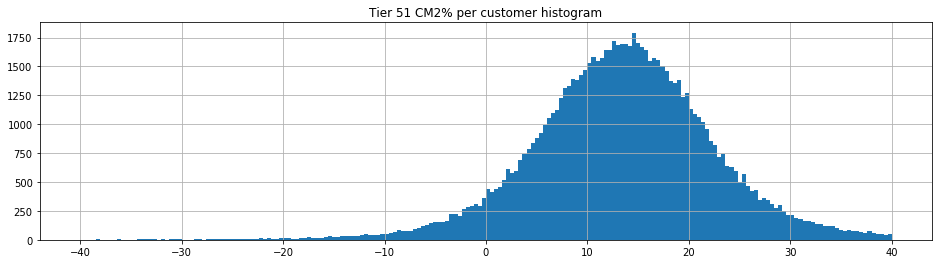

count    8.533200e+04
mean    -8.231990e+12
std      2.404699e+15
min     -7.024522e+17
25%      8.121606e+00
50%      1.362383e+01
75%      1.905325e+01
max      6.728710e+07
dtype: float64

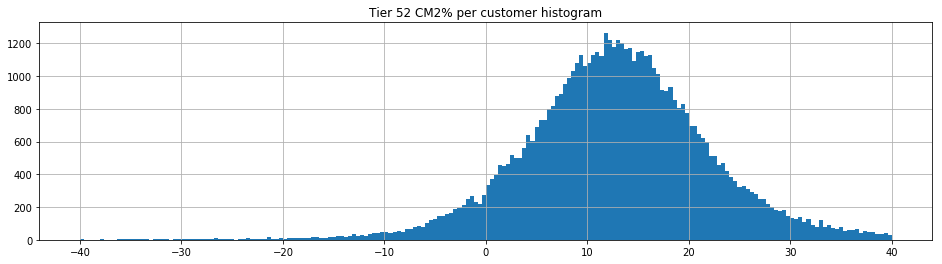

count    6.031300e+04
mean             -inf
std               NaN
min              -inf
25%      7.370495e+00
50%      1.285788e+01
75%      1.842618e+01
max      1.271513e+18
dtype: float64

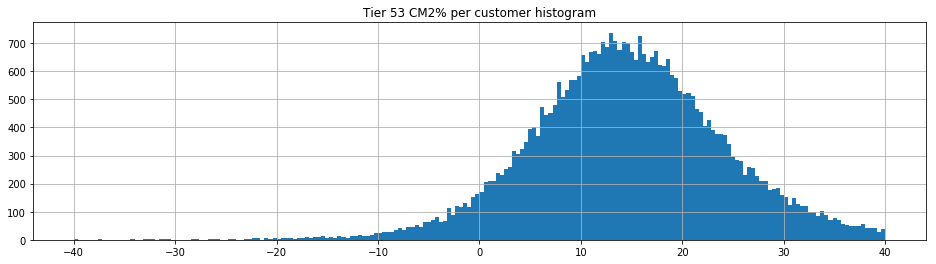

count    38771.000000
mean        14.659883
std         16.738637
min      -1475.083109
25%          8.653750
50%         14.556600
75%         20.792320
max         69.715662
dtype: float64

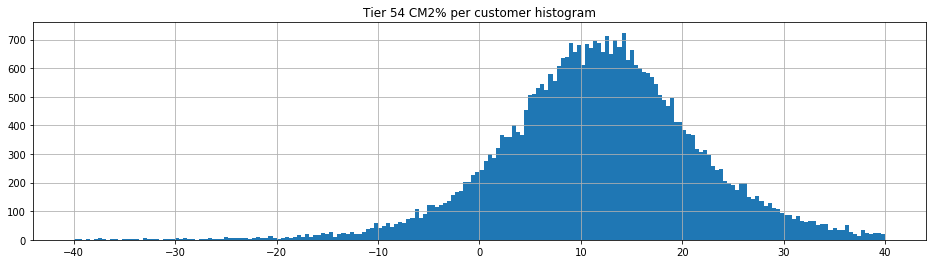

count    3.745700e+04
mean             -inf
std               NaN
min              -inf
25%      5.993629e+00
50%      1.193747e+01
75%      1.788717e+01
max      2.359401e+18
dtype: float64

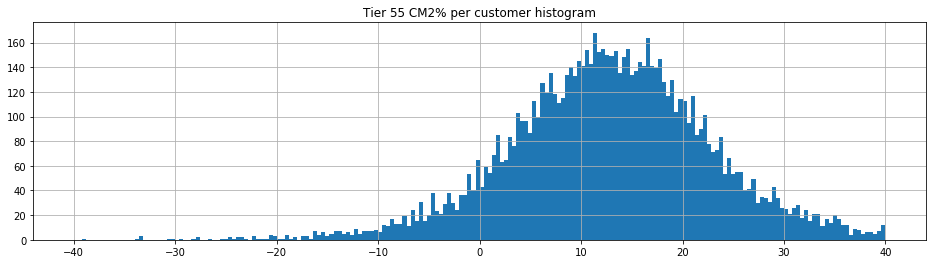

count    8857.000000
mean       12.892149
std        14.108114
min      -506.383219
25%         6.704742
50%        13.032171
75%        19.354851
max        70.571863
dtype: float64

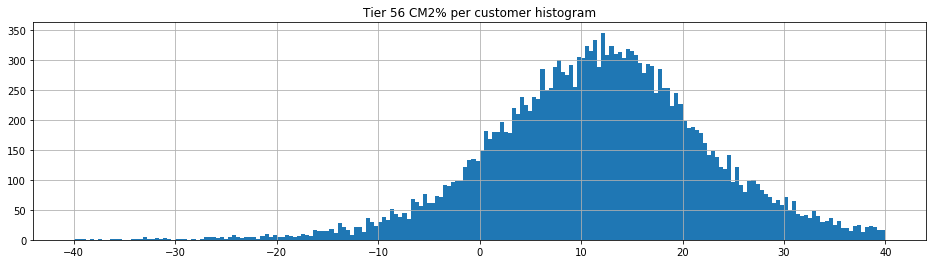

count    1.952900e+04
mean    -6.847796e+13
std      9.569535e+15
min     -1.337306e+18
25%      5.172422e+00
50%      1.203673e+01
75%      1.859629e+01
max      7.046429e+01
dtype: float64

In [139]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [131]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  85332
Total customers in Tier  52 :  60313


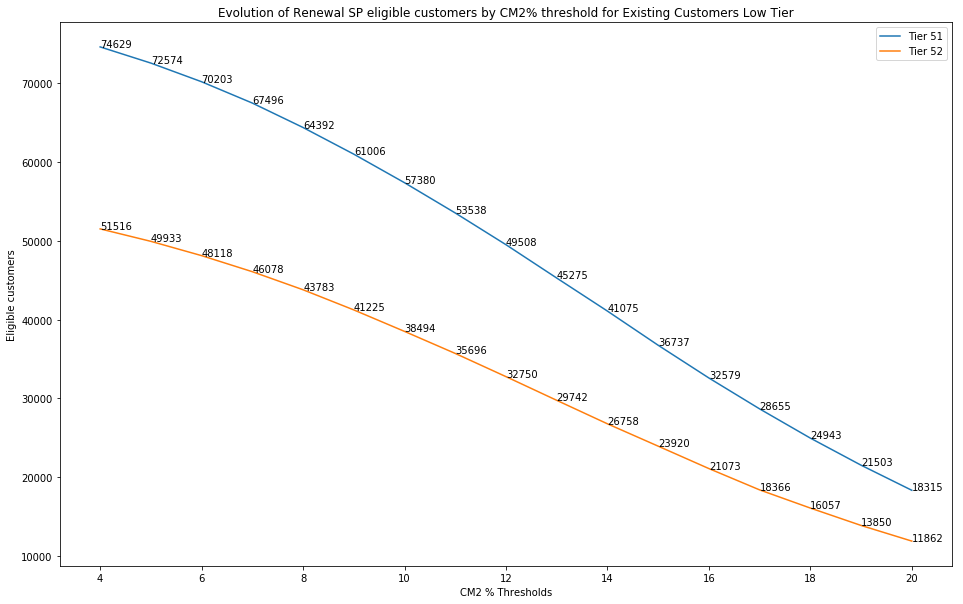

In [132]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  38771
Total customers in Tier  54 :  37457


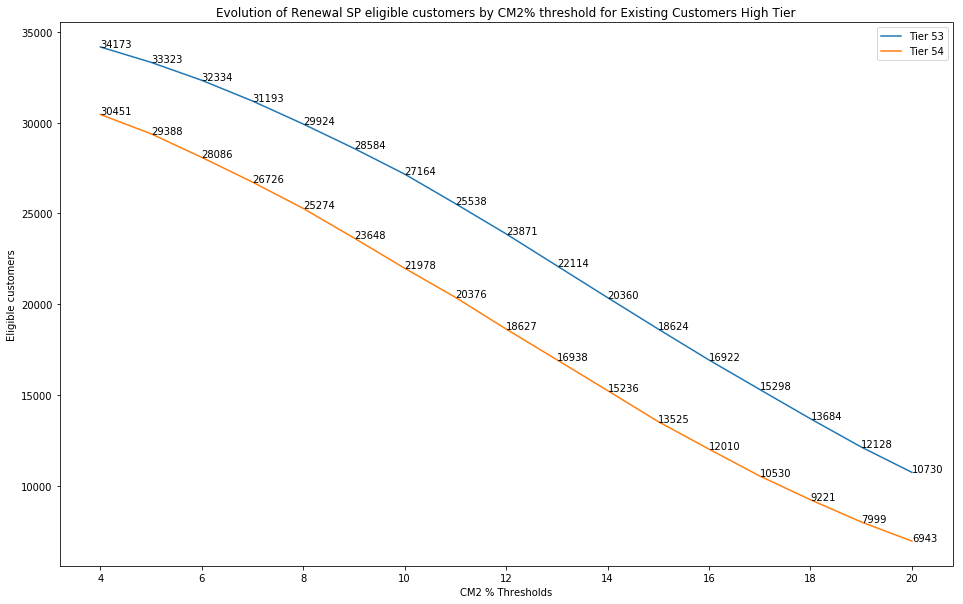

In [133]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  8857
Total customers in Tier  56 :  19529


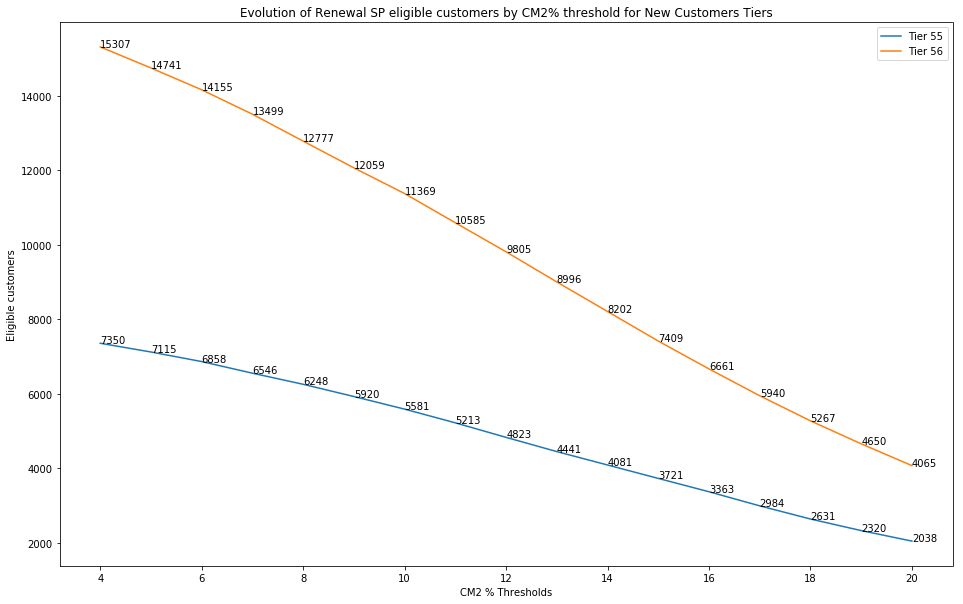

In [134]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

In [135]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [136]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,15203435,[52],5,411.84,369.06,82.37,113.24,22.65,30.68,0.0,0.0,57.60,11.52,15.61,0.00,0.00
1,3177149,[54],2,157.62,142.72,78.81,51.97,25.98,36.41,0.0,0.0,25.50,12.75,17.86,0.00,0.00
2,11981019,[53],4,297.85,261.63,74.46,54.27,13.57,20.74,0.0,0.0,24.00,6.00,9.17,0.00,0.00
3,7352563,[54],3,563.52,519.57,187.84,116.08,38.69,22.34,0.0,0.0,38.20,12.73,7.35,0.00,0.00
4,5430768,[54],5,355.85,325.91,71.17,89.46,17.89,27.45,0.0,0.0,50.52,10.10,15.50,0.00,0.00
5,5663377,[201],3,442.09,390.71,147.36,72.75,24.25,18.62,0.0,0.0,47.65,15.88,12.20,0.00,0.00
6,4902566,[52],3,546.09,458.29,182.03,162.09,54.03,35.37,0.0,0.0,51.10,17.03,11.15,0.00,0.00
7,527243,[51],6,297.29,266.63,49.55,90.28,15.05,33.86,0.0,0.0,40.35,6.72,15.13,16.67,-2.72
8,12441824,[201],6,308.44,264.13,51.41,118.57,19.76,44.89,0.0,0.0,65.23,10.87,24.70,0.00,0.00
9,919989,[52],3,514.88,475.71,171.63,128.07,42.69,26.92,0.0,0.0,62.20,20.73,13.07,0.00,0.00


In [137]:
sp_customers.round(2).to_csv('de_customers_q1.csv', sep=';', index=False, encoding='utf-8')